In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# পরিসংখ্যান এবং মেশিন লার্নিং-এর ভূমিকা: ক্লাস ১ (বিগিনার লেভেল)

এই নোটবুকটি পরিসংখ্যানের মৌলিক টপিকগুলোকে বাংলায় ব্যাখ্যা করবে, যা মেশিন লার্নিং (ML)-এর জন্য অত্যন্ত গুরুত্বপূর্ণ। প্রত্যেক টপিক সেকশন-ওয়াইজ ব্যাখ্যা করা হয়েছে, উদাহরণ সহ, কীভাবে কাজ করে, কেন দরকারী, এবং ML-সম্পর্কিত কোড উদাহরণ। এটি জুপিটার নোটবুক ফরম্যাটে তৈরি, যাতে তুমি GitHub-এ আপলোড করতে পারো।

**প্রয়োজনীয় লাইব্রেরি:** NumPy, Pandas, Matplotlib, Seaborn। ইনস্টল করো:  
```bash
pip install numpy pandas matplotlib seaborn
```

---

## #1: Introductory Talk (পরিচিতি আলোচনা)

পরিসংখ্যান হলো ডেটা সংগ্রহ, বিশ্লেষণ, ব্যাখ্যা এবং উপস্থাপনের বিজ্ঞান। মেশিন লার্নিং-এ এটি ডেটা থেকে প্যাটার্ন শেখার জন্য অপরিহার্য। বিগিনার হিসেবে জেনে রাখো, ML মডেলগুলো ডেটা ছাড়া কিছুই নয়, আর পরিসংখ্যান সেই ডেটাকে বোঝার চাবিকাঠি।

**কীভাবে কাজ করে?**  
ডেটাকে সামারাইজ করে (যেমন গড়) এবং অনুমান করে (যেমন প্রবাবিলিটি)।

**কেন দরকার?**  
ML-এ ডেটা প্রিপ্রোসেসিং, মডেল ইভালুয়েশন এবং ডিসিশন মেকিং-এ সাহায্য করে। ছাড়া মডেল ভুল প্রেডিকশন দেবে।

**উদাহরণ (ML-সম্পর্কিত):**  
আইরিস ফ্লাওয়ার ডেটাসেট লোড করে বেসিক স্ট্যাটস দেখি।
```python
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

print("ডেটাসেটের সাইজ:", df.shape)
print("প্রথম কয়েকটা রো:\n", df.head())
```

**ব্যাখ্যা:** এই কোড sklearn থেকে আইরিস ডেটা লোড করে। ML-এ প্রথমে ডেটা বোঝা দরকার, যা পরিসংখ্যান দিয়ে শুরু হয়।

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

print("ডেটাসেটের সাইজ:", df.shape)
print("প্রথম কয়েকটা রো:\n", df.head())

ডেটাসেটের সাইজ: (150, 5)
প্রথম কয়েকটা রো:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


---

## #2: Descriptive VS Inferential Statistics (বর্ণনামূলক বনাম অনুমানমূলক পরিসংখ্যান)

**বর্ণনামূলক পরিসংখ্যান:** ডেটাকে সংক্ষিপ্ত করে দেখায় (গড়, গ্রাফ)।  
**অনুমানমূলক পরিসংখ্যান:** স্যাম্পল থেকে পপুলেশন অনুমান করে (যেমন কনফিডেন্স ইন্টারভাল)।

**কীভাবে কাজ করে?**  
বর্ণনামূলক: ডেটা সামারাইজ করে। অনুমানমূলক: প্রবাবিলিটি দিয়ে পপুলেশন অনুমান করে।

**কেন দরকার?**  
ML-এ বর্ণনামূলক ডেটা এক্সপ্লোর করে, অনুমানমূলক মডেলের নির্ভরযোগ্যতা চেক করে। ছাড়া মডেল নতুন ডেটায় ফেল করবে।

**উদাহরণ (ML-সম্পর্কিত):**  
আইরিস ডেটায় বর্ণনামূলক স্ট্যাটস এবং কনফিডেন্স ইন্টারভাল।

```python
import numpy as np
from scipy import stats

print("বর্ণনামূলক স্ট্যাটস:\n", df.describe())

mean = np.mean(df['sepal length (cm)'])
conf_int = stats.t.interval(0.95, len(df)-1, loc=mean, scale=stats.sem(df['sepal length (cm)']))
print("গড়:", mean, "\nকনফিডেন্স ইন্টারভাল:", conf_int)
```

**ব্যাখ্যা:** df.describe() দিয়ে সামারি, stats.t.interval দিয়ে পপুলেশন অনুমান। ML-এ এটি মডেল অ্যাকুরেসি চেকে ব্যবহৃত।

---


In [3]:
import numpy as np
from scipy import stats

print("বর্ণনামূলক স্ট্যাটস:\n", df.describe())

mean = np.mean(df['sepal length (cm)'])
conf_int = stats.t.interval(0.95, len(df)-1, loc=mean, scale=stats.sem(df['sepal length (cm)']))
print("গড়:", mean, "\nকনফিডেন্স ইন্টারভাল:", conf_int)

বর্ণনামূলক স্ট্যাটস:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
গড়: 5.843333333333334 
কনফিডেন্স ইন্টারভাল: (np.float64(5.709732481507366), np.float64(5.976934185159301))


## #3: Population VS Sample (পপুলেশন বনাম স্যাম্পল)

**পপুলেশন:** পুরো ডেটা (যেমন সব ফ্লাওয়ারের মাপ)।  
**স্যাম্পল:** পপুলেশনের ছোট অংশ (যেমন ৫০টা ফ্লাওয়ার)।

**কীভাবে কাজ করে?**  
পপুলেশন: সম্পূর্ণ অ্যানালাইসিস। স্যাম্পল: র্যান্ডম সিলেকশন দিয়ে অনুমান।

**কেন দরকার?**  
ML-এ পুরো ডেটা পাওয়া কঠিন। স্যাম্পল দিয়ে ট্রেন করা হয়। ভুল স্যাম্পল মডেলকে বায়াসড করে।

**উদাহরণ (ML-সম্পর্কিত):**  
আইরিস পপুলেশন থেকে স্যাম্পল গড়।

```python
pop_mean = np.mean(df['sepal length (cm)'])
print("পপুলেশন গড়:", pop_mean)

sample = df.sample(50, random_state=42)
sample_mean = np.mean(sample['sepal length (cm)'])
print("স্যাম্পল গড়:", sample_mean)
```

**ব্যাখ্যা:** df.sample() দিয়ে স্যাম্পল। ML-এ ট্রেন-টেস্ট স্প্লিট এমনই।

---

In [4]:
pop_mean = np.mean(df['sepal length (cm)'])
print("পপুলেশন গড়:", pop_mean)

sample = df.sample(50, random_state=42)
sample_mean = np.mean(sample['sepal length (cm)'])
print("স্যাম্পল গড়:", sample_mean)

পপুলেশন গড়: 5.843333333333334
স্যাম্পল গড়: 5.900000000000001


## #4: Measure of Central Tendency (কেন্দ্রীয় প্রবণতার মাপক)

গড়, মিডিয়ান, মোড – ডেটার কেন্দ্রীয় মান।

**কীভাবে কাজ করে?**  
গড়: যোগফল/সংখ্যা। মিডিয়ান: সাজানো ডেটার মাঝের মান। মোড: ঘন মান।

**কেন দরকার?**  
ML-এ ফিচার নর্মালাইজেশন, মিসিং ভ্যালু ফিল। আউটলায়ার থাকলে মিডিয়ান ভালো।

**উদাহরণ (ML-সম্পর্কিত):**  
আইরিস ডেটায় সেন্ট্রাল টেন্ডেন্সি।

```python
mean = df['sepal length (cm)'].mean()
median = df['sepal length (cm)'].median()
mode = df['sepal length (cm)'].mode()[0]
print("গড়:", mean, "\nমিডিয়ান:", median, "\nমোড:", mode)
```

**ব্যাখ্যা:** pandas mean(), median(), mode()। ML-এ ইম্পুটেশনে ব্যবহৃত।

---

In [5]:
mean = df['sepal length (cm)'].mean()
median = df['sepal length (cm)'].median()
mode = df['sepal length (cm)'].mode()[0]
print("গড়:", mean, "\nমিডিয়ান:", median, "\nমোড:", mode)

গড়: 5.843333333333334 
মিডিয়ান: 5.8 
মোড: 5.0


## #5: Measure of Dispersion/Variation/Variability (বিচ্ছুরণের মাপক)

রেঞ্জ, ভ্যারিয়েন্স, স্ট্যান্ডার্ড ডেভিয়েশন (SD) – ডেটার ছড়ানো।

**কীভাবে কাজ করে?**  
রেঞ্জ: max - min। ভ্যারিয়েন্স: (x - mean)^2 এর গড়। SD: ভ্যারিয়েন্সের sqrt।

**কেন দরকার?**  
ML-এ ফিচার স্কেলিং, ক্লাস্টারিং। উচ্চ SD মানে অস্থির ডেটা।

**উদাহরণ (ML-সম্পর্কিত):**  
আইরিস ডেটায় ডিসপার্শন।

```python
range_val = df['sepal length (cm)'].max() - df['sepal length (cm)'].min()
variance = df['sepal length (cm)'].var()
std = df['sepal length (cm)'].std()
print("রেঞ্জ:", range_val, "\nভ্যারিয়েন্স:", variance, "\nSD:", std)
```

**ব্যাখ্যা:** pandas var(), std()। ML-এ z-score স্ট্যান্ডার্ডাইজেশনে ব্যবহৃত।

---

In [6]:
range_val = df['sepal length (cm)'].max() - df['sepal length (cm)'].min()
variance = df['sepal length (cm)'].var()
std = df['sepal length (cm)'].std()
print("রেঞ্জ:", range_val, "\nভ্যারিয়েন্স:", variance, "\nSD:", std)

রেঞ্জ: 3.6000000000000005 
ভ্যারিয়েন্স: 0.6856935123042507 
SD: 0.828066127977863


## #6: Quantiles (কোয়ান্টাইলস)

ডেটাকে সমান অংশে ভাগ (Q1: 25%, Q2: 50%, Q3: 75%)।

**কীভাবে কাজ করে?**  
ডেটা সাজিয়ে পার্সেন্টাইল ক্যালকুলেট।

**কেন দরকার?**  
ML-এ আউটলায়ার ডিটেকশন, নর্মালাইজেশন। IQR দিয়ে আউটলায়ার খুঁজে।

**উদাহরণ (ML-সম্পর্কিত):**  
আইরিস ডেটায় কোয়ান্টাইল।

```python
q1 = df['sepal length (cm)'].quantile(0.25)
q2 = df['sepal length (cm)'].quantile(0.5)
q3 = df['sepal length (cm)'].quantile(0.75)
print("Q1:", q1, "\nQ2 (মিডিয়ান):", q2, "\nQ3:", q3)
```

**ব্যাখ্যা:** pandas quantile()। ML-এ RobustScaler-এ ব্যবহৃত।

---

In [8]:
q1 = df['sepal length (cm)'].quantile(0.25)
q2 = df['sepal length (cm)'].quantile(0.5)
q3 = df['sepal length (cm)'].quantile(0.75)
print("Q1:", q1, "\nQ2 (মিডিয়ান):", q2, "\nQ3:", q3)

Q1: 5.1 
Q2 (মিডিয়ান): 5.8 
Q3: 6.4


## #7: 5 Number Summary And BoxPlot (৫ সংখ্যার সারাংশ এবং বক্সপ্লট)

মিন, Q1, মিডিয়ান, Q3, ম্যাক্স। বক্সপ্লট: ভিজুয়ালাইজেশন।

**কীভাবে কাজ করে?**  
সারাংশ: কোয়ান্টাইল থেকে বের করা। বক্সপ্লট: বক্সে IQR, হুইস্কারে রেঞ্জ।

**কেন দরকার?**  
ML-এ ডেটা ডিস্ট্রিবিউশন দেখে ক্লিনিং। আউটলায়ার ভিজুয়ালি দেখা যায়।

**উদাহরণ (ML-সম্পর্কিত):**  
আইরিস ডেটায় ৫ নাম্বার এবং বক্সপ্লট।

```python
import matplotlib.pyplot as plt

min_val = df['sepal length (cm)'].min()
max_val = df['sepal length (cm)'].max()
print("মিন:", min_val, "\nQ1:", q1, "\nমিডিয়ান:", q2, "\nQ3:", q3, "\nম্যাক্স:", max_val)

plt.boxplot(df['sepal length (cm)'])
plt.title("Sepal Length BoxPlot")
plt.show()
```

**ব্যাখ্যা:** matplotlib boxplot()। ML-এ EDA-তে ব্যবহৃত।

---

মিন: 4.3 
Q1: 5.1 
মিডিয়ান: 5.8 
Q3: 6.4 
ম্যাক্স: 7.9


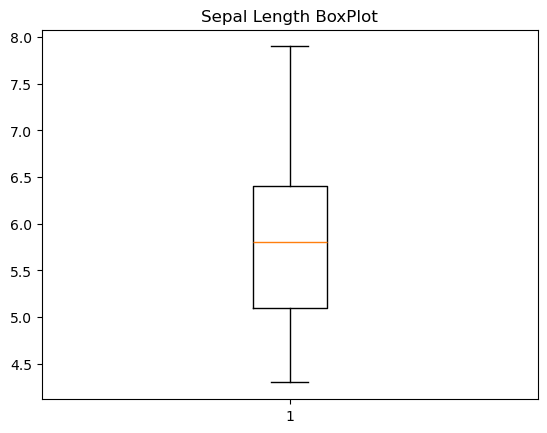

In [10]:
min_val = df['sepal length (cm)'].min()
max_val = df['sepal length (cm)'].max()
print("মিন:", min_val, "\nQ1:", q1, "\nমিডিয়ান:", q2, "\nQ3:", q3, "\nম্যাক্স:", max_val)

plt.boxplot(df['sepal length (cm)'])
plt.title("Sepal Length BoxPlot")
plt.show()

## #8: Data Types in Statistics (পরিসংখ্যানে ডেটার ধরন)

ডেটা দুই ধরনের: **ক্যাটেগরিকাল** (নামমাত্র, ক্রমিক) এবং **নিউমেরিকাল** (ক্রমাগত, বিচ্ছিন্ন)।

**কীভাবে কাজ করে?**  
- ক্যাটেগরিকাল (নামমাত্র): কোন ক্রম নেই (যেমন ফ্লাওয়ার স্পিসিস)।  
- ক্যাটেগরিকাল (ক্রমিক): ক্রম আছে (যেমন গ্রেড: A, B, C)।  
- নিউমেরিকাল (ক্রমাগত): দশমিক সহ (যেমন sepal length)।  
- নিউমেরিকাল (বিচ্ছিন্ন): পূর্ণ সংখ্যা (যেমন সন্তান সংখ্যা)।

**কেন দরকার?**  
ML-এ ক্যাটেগরিকাল ডেটা এনকোডিং (যেমন One-Hot Encoding) এবং নিউমেরিকাল ডেটা স্কেলিং-এর জন্য। ভুল ডেটা টাইপ ব্যবহার করলে মডেল ভুল হবে।

**উদাহরণ (ML-সম্পর্কিত):**  
আইরিস ডেটায় ডেটা টাইপ চেক এবং ক্যাটেগরিকাল এনকোডিং।

```python
print("ডেটা টাইপ:\n", df.dtypes)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])
print("এনকোডেড species:\n", df[['species', 'species_encoded']].head())
```

**ব্যাখ্যা:** df.dtypes দিয়ে ডেটা টাইপ। LabelEncoder দিয়ে ক্যাটেগরিকাল ডেটা নিউমেরিকালে রূপান্তর, যা ML মডেলে ব্যবহৃত।

---

In [11]:
print("ডেটা টাইপ:\n", df.dtypes)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])
print("এনকোডেড species:\n", df[['species', 'species_encoded']].head())

ডেটা টাইপ:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object
এনকোডেড species:
   species  species_encoded
0  setosa                0
1  setosa                0
2  setosa                0
3  setosa                0
4  setosa                0


## #9: Basic Data Visualization (মৌলিক ডেটা ভিজুয়ালাইজেশন)

হিস্টোগ্রাম এবং স্ক্যাটার প্লট দিয়ে ডেটা ডিস্ট্রিবিউশন এবং সম্পর্ক দেখা।

**কীভাবে কাজ করে?**  
- হিস্টোগ্রাম: ডেটার ফ্রিকোয়েন্সি ডিস্ট্রিবিউশন।  
- স্ক্যাটার প্লট: দুটি ফিচারের সম্পর্ক।

**কেন দরকার?**  
ML-এ EDA-তে ডেটা বোঝা, ফিচার সম্পর্ক খুঁজে। বিগিনারদের জন্য ভিজুয়ালাইজেশন সহজে ডেটা বোঝায়।

**উদাহরণ (ML-সম্পর্কিত):**  
আইরিস ডেটায় হিস্টোগ্রাম এবং স্ক্যাটার প্লট।

```python
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['sepal length (cm)'], bins=20, kde=True)
plt.title("Sepal Length Histogram")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df)
plt.title("Sepal Length vs Sepal Width")
plt.show()
```

**ব্যাখ্যা:** sns.histplot() দিয়ে ডিস্ট্রিবিউশন, sns.scatterplot() দিয়ে ফিচার সম্পর্ক। ML-এ এটি ফিচার সিলেকশনে সাহায্য করে।

---

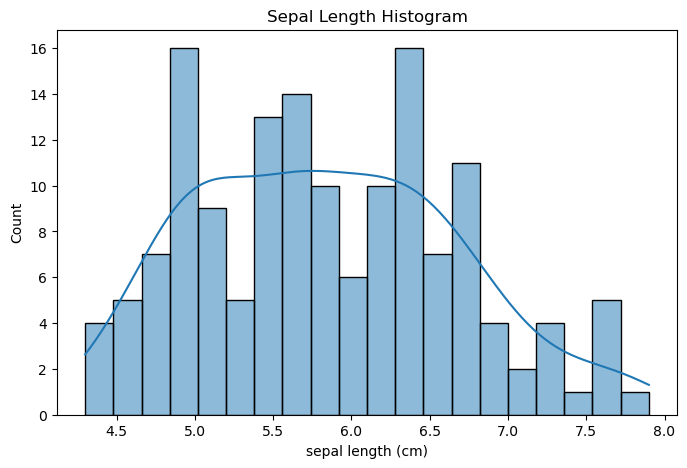

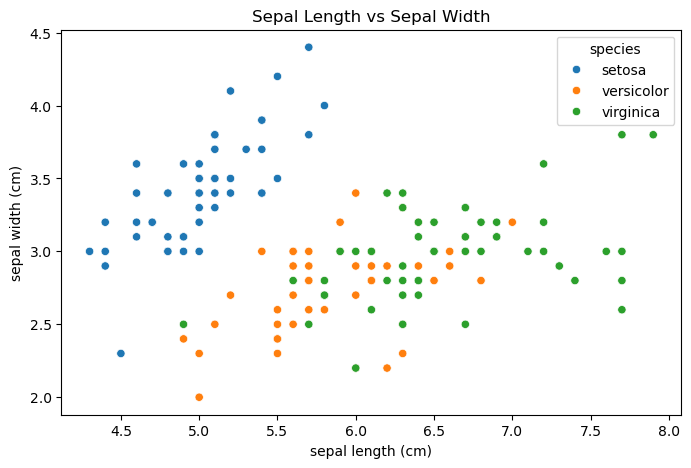

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sepal length (cm)'], bins=20, kde=True)
plt.title("Sepal Length Histogram")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df)
plt.title("Sepal Length vs Sepal Width")
plt.show()